In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg as lin
import itertools

In [2]:
## Function for the dynamical system, competitive LV
def LV_dynamics(A_communityMatrix, fixed_point, x0_IC, epsilon_fpThresh, delta_timeStep, endtime): # no end time necessary
    numSteps = round(endtime/delta_timeStep)
    T_time = np.linspace(1,endtime,numSteps)
    x_point = np.matrix(np.zeros((len(x0_IC),numSteps)))
    
    fp = epsilon_fpThresh
    dt = delta_timeStep
    ET = endtime
    
    A = A_communityMatrix
    p = np.matrix(fixed_point)
    x0 = np.matrix(x0_IC)
    r = A*p
    x_point[:,0] = x0.T
    
    for n in range(1,numSteps):
        dx = np.multiply(dt*x_point[:,n-1],(r - A*x_point[:,n-1]))
        if np.sqrt((dx.T * dx)[0,0]) < fp: #Assuming we've hit the fixed point
            break
        x_point[:,n] = x_point[:,n-1] + dx
        
    x_point = x_point[:,0:n-1]
    #T_time = T_time[:,1:n-1]
    return x_point

In [3]:
## Reaction with two systems boardering at x=0
def LV_reaction(u,x):
    A = np.array([[ 0.14 ,  0.021,  0.164, -0.012,  0.321,  0.639],
        [ 0.021,  0.18 , -0.137,  0.017, -0.256,  0.497],
        [ 0.164, -0.137,  1.649, -0.578, -0.268,  1.4  ],
        [-0.012,  0.017, -0.578,  0.404, -0.181, -0.277],
        [ 0.321, -0.256, -0.268, -0.181,  0.535,  0.071],
        [ 0.639,  0.497,  1.4  , -0.277,  0.071,  0.68 ]])
    p = np.array([1,1,1,1,1,1])
    r = A@ p
    if x >= 0:
        u0 = np.array([8.124,1.34,0.656,.001,.001,.001])
    if x < 0:
        u0 = np.array([.001,.001,.001,2.315,0.492,5.318])
    
    return u@(r - A@ u)


In [4]:
dt = .05**2
dx = .1
eps = .5
rho = dt/(dx**2)
A1 = np.array([[ 0.896,  0.251, -0.103,  0.563, -0.046,  0.325],
       [ 0.251,  0.848, -0.206,  0.196,  0.06 ,  0.828],
       [-0.103, -0.206,  0.939,  0.105, -0.008,  0.051],
       [ 0.563,  0.196,  0.105,  0.962,  0.375,  0.401],
       [-0.046,  0.06 , -0.008,  0.375,  0.906,  0.186],
       [ 0.325,  0.828,  0.051,  0.401,  0.186,  0.976]])

A2 = np.array([[ 0.845,  0.123,  0.085, -0.145, -0.362, -0.445],
       [ 0.123,  0.954,  0.242,  0.16 ,  0.237, -0.15 ],
       [ 0.085,  0.242,  0.942,  0.551, -0.029, -0.027],
       [-0.145,  0.16 ,  0.551,  0.813,  0.02 ,  0.08 ],
       [-0.362,  0.237, -0.029,  0.02 ,  0.986,  0.105],
       [-0.445, -0.15 , -0.027,  0.08 ,  0.105,  0.972]])
p1 = np.array([1,1,1,1,1,1])
p2 = (1/2.)*np.array([1,1,1,1,1,1])
r1 = A1@ p1
r2 = A2@ p2



K = 250
T = 2000
# K = int(T/4)

U = np.zeros((T,K+1,6))

for k in range(K + 1):
    if k >= K/2 + 1:
        U[0,k,:] = p1
    else:
        U[0,k,:] = p2

# U[0,K/2,:] = np.array([.1,.1,.1,.1,.1,.1])

for i in range(T-1):
    for k in range(K - 1):
        k = k+1
        if k >= K/2 + 1:
            U[i+1,k,:] = U[i,k,:] + eps*rho*(U[i,k+1,:] - 2*U[i,k,:] + U[i,k-1,:]) + dt*(U[i,k,:]*(r1-A1@ U[i,k,:]))
        else:
            U[i+1,k,:] = U[i,k,:] + eps*rho*(U[i,k+1,:] - 2*U[i,k,:] + U[i,k-1,:]) + dt*(U[i,k,:]*(r2-A2@ U[i,k,:]))
#     U[i+1,K,:] = U[i,K,:] + eps*rho*(U[i,K,:] - 2*U[i,K-1,:] + U[i,K-2,:]) + dt*(U[i,K,:]*(r-A@ U[i,K,:]))
    U[i+1,K,:] = p1
#     U[i+1,0,:] = U[i,0,:] + eps*rho*(U[i,2,:] - 2*U[i,1,:] + U[i,0,:]) + dt*(U[i,0,:]*(r-A@ U[i,0,:]))
    U[i+1,0,:] = p2


This is the first example.  
Two community matrices, two different globally stable fixed points (1,1,1,1,1,1) and .5*(1,1,1,1,1,1).
Here we find our waves are traveling very slowly to the left for species 1, 4, and 6.
As for the other 3 species, it is more difficult to tell due to the effects of the diffusion, but species 2 and 3 can be seen to be traveling right if you only look at later time samples.
As for species 5, it appears to not be traveling until much much later, and then it travels left.

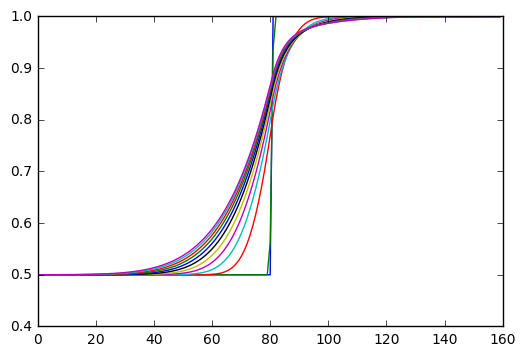

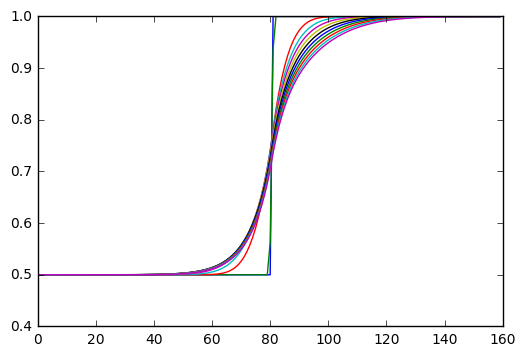

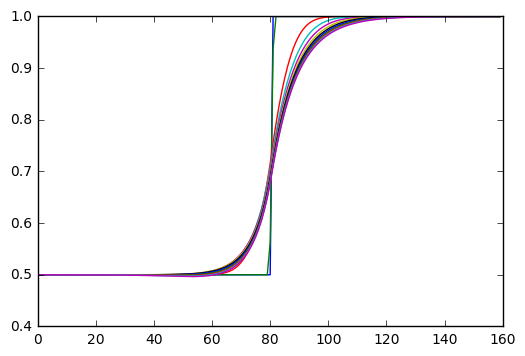

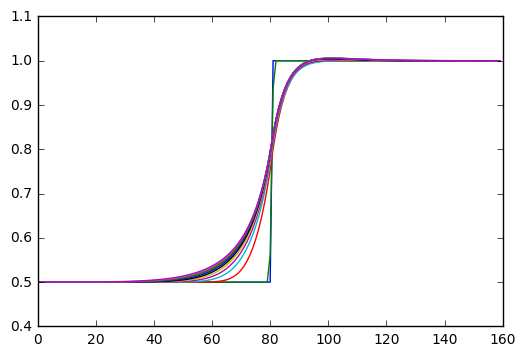

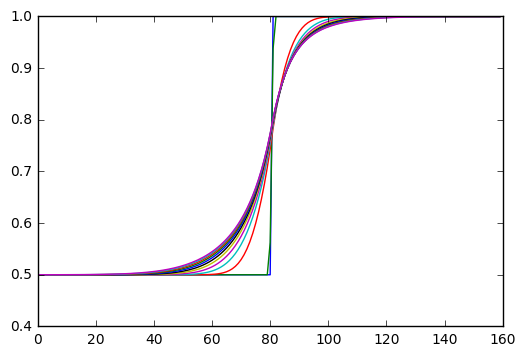

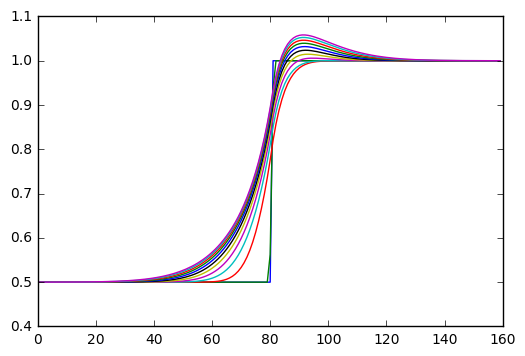

In [5]:
space_bounds = range(int(K/2)-80,int(K/2)+80)
for i in range(6):
    plt.figure(i+1)
    plt.plot(U[0,space_bounds,i])
    plt.plot(U[1,space_bounds,i])
    plt.plot(U[200-1,space_bounds,i])
    plt.plot(U[400-1,space_bounds,i])
    plt.plot(U[600-1,space_bounds,i])
    plt.plot(U[800-1,space_bounds,i])
    plt.plot(U[1000-1,space_bounds,i])
    plt.plot(U[1200-1,space_bounds,i])
    plt.plot(U[1400-1,space_bounds,i])
    plt.plot(U[1600-1,space_bounds,i])
    plt.plot(U[1800-1,space_bounds,i])
    plt.plot(U[2000-1,space_bounds,i])
    plt.show()

In [6]:
np.set_printoptions(suppress=True)
U[200-1,:,:].round(5)

array([[ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5],
       [ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5],
       ..., 
       [ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ]])

In [7]:
dt = .05**2
dx = .1
eps = .5
rho = dt/(dx**2)
A = np.array([[ 0.14 ,  0.021,  0.164, -0.012,  0.321,  0.639],
              [ 0.021,  0.18 , -0.137,  0.017, -0.256,  0.497],
              [ 0.164, -0.137,  1.649, -0.578, -0.268,  1.4  ],
              [-0.012,  0.017, -0.578,  0.404, -0.181, -0.277],
              [ 0.321, -0.256, -0.268, -0.181,  0.535,  0.071],
              [ 0.639,  0.497,  1.4  , -0.277,  0.071,  0.68 ]])
p = np.array([1,1,1,1,1,1])
r = A@ p


p1 = np.array([8.12365941,1.34022686,0.65574951,0,0,0])
p2 = np.array([0,0,0,2.31488624,0.49236209,5.31803791])


K = 1000
T = 8000
U = np.zeros((T,K+1,6))

for k in range(K + 1):
    if k >= K/2 + 1:
        U[0,k,:] = p1
    else:
        U[0,k,:] = p2


for i in range(T-1):
    for k in range(K - 1):
        k = k+1
        U[i+1,k,:] = U[i,k,:] + eps*rho*(U[i,k+1,:] - 2*U[i,k,:] + U[i,k-1,:]) + dt*(U[i,k,:]*(r-A@ U[i,k,:]))
#     U[i+1,K,:] = U[i,K,:] + eps*rho*(U[i,K,:] - 2*U[i,K-1,:] + U[i,K-2,:]) + dt*(U[i,K,:]*(r-A@ U[i,K,:]))
    U[i+1,K,:] = p1
#     U[i+1,0,:] = U[i,0,:] + eps*rho*(U[i,2,:] - 2*U[i,1,:] + U[i,0,:]) + dt*(U[i,0,:]*(r-A@ U[i,0,:]))
    U[i+1,0,:] = p2


This is the second example. 
There is only one community matrix, with two stable points on the boundary, with persisting sets (1,2,3) and (4,5,6). 
With diffusion added, we see that species 1,2,3 are tending to extinction.  Species 4,5,6 are initially tending to extinction but then start to take of the "space" (in x) where the other species where surving.

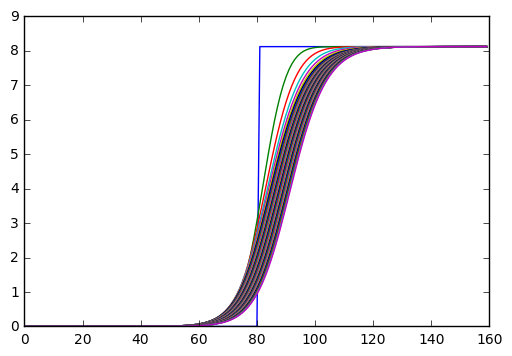

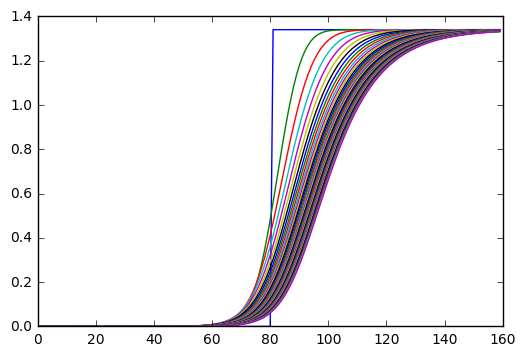

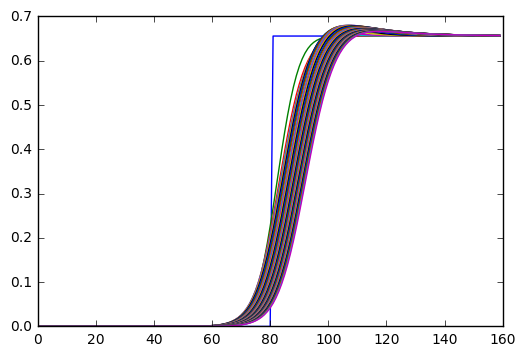

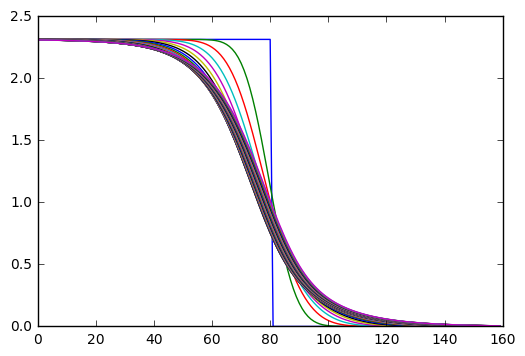

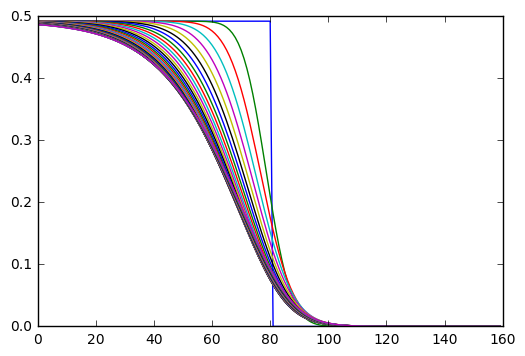

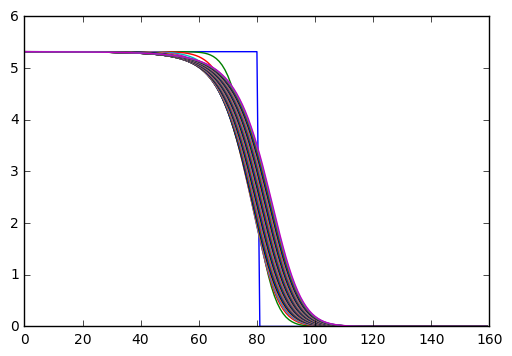

In [8]:
space_bounds = range(int(K/2)-80,int(K/2)+80)
for i in range(6):
    plt.figure(i+1)
    for j in range(0,T,200):
        plt.plot(U[j,space_bounds,i])
    plt.show()

In [9]:
np.set_printoptions(suppress=True)
U[1000-1,:,0].round(5)

array([ 0.     ,  0.     ,  0.     , ...,  8.12366,  8.12366,  8.12366])

In [10]:
## Many normally distributed starting points and their dynamics
def MonteCarlo_LV(n_samples, A, p):
    n_spec = len(A)
    x_start = np.abs(np.random.randn(n_samples, n_spec))
    x_end = np.matrix(np.zeros((n_spec, n_samples)))
    for i in range(x_start.shape[0]):
        dyn_mat = LV_dynamics(A, p, x_start[i,:], .0001, .01, 10000)
        x_end[:,i] = dyn_mat[:,-1]
        plt.figure(i)
        for j in range(n_spec):
            plt.plot(dyn_mat[j,:].tolist()[0])
    plt.show()
    
    return x_end.T.round(2)

/Users/michaellivesay/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: overflow encountered in multiply


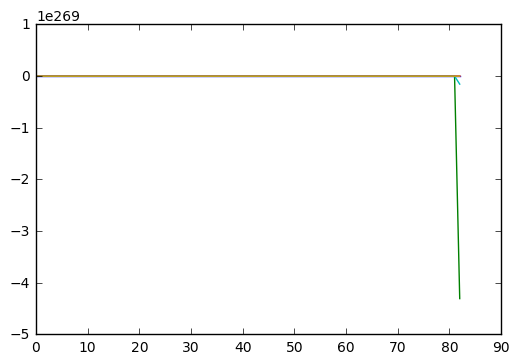

array([[ 0.899,  0.445,  0.101,  0.774,  0.48 ,  0.842],
       [-0.682,  0.706,  0.764, -0.973, -0.705, -0.241],
       [ 0.155,  0.148,  0.45 , -0.754,  0.874, -0.433],
       [-0.04 , -0.763, -0.632,  0.249,  0.422, -0.174],
       [-0.943, -0.367,  0.242, -0.831,  0.005, -0.284],
       [-0.333,  0.722,  0.759,  0.142,  0.694,  0.323]])

In [11]:
## Random symmetric matrix A

N = 6
A = 2*np.random.rand(N,N) - 1.
#A = A + A.T
A = A.round(3)
A[np.diag_indices(N)] = np.abs(A.diagonal())


I = np.matrix([[1,0,0,0,0,0],
               [0,1,0,0,0,0],
               [0,0,1,0,0,0],
               [0,0,0,1,0,0],
               [0,0,0,0,1,0],
               [0,0,0,0,0,1]])
p = np.matrix([1,1,1,1,1,1]).T

#MonteCarlo_LV(2,A,p)

dyn_mat = LV_dynamics(A, p, [.9,.9,.9,.9,.9,.9], .001, .1, 100)
plt.figure()
for j in range(6):
    plt.plot(dyn_mat[j,:].tolist()[0])
#plt.savefig('Noncompetitive2', bbox_inches='tight')
plt.show()

A

In [12]:

N = 6
A = np.random.rand(N,N) - 1/2.
A = A + A.T
A = A.round(3)
A[np.diag_indices(N)] = np.abs(A.diagonal())

A = np.array([[ 0.14 ,  0.021,  0.164, -0.012,  0.321,  0.639],
              [ 0.021,  0.18 , -0.137,  0.017, -0.256,  0.497],
              [ 0.164, -0.137,  1.649, -0.578, -0.268,  1.4  ],
              [-0.012,  0.017, -0.578,  0.404, -0.181, -0.277],
              [ 0.321, -0.256, -0.268, -0.181,  0.535,  0.071],
              [ 0.639,  0.497,  1.4  , -0.277,  0.071,  0.68 ]])

# A = np.array([[ 0.896,  0.251, -0.103,  0.563, -0.046,  0.325],
#        [ 0.251,  0.848, -0.206,  0.196,  0.06 ,  0.828],
#        [-0.103, -0.206,  0.939,  0.105, -0.008,  0.051],
#        [ 0.563,  0.196,  0.105,  0.962,  0.375,  0.401],
#        [-0.046,  0.06 , -0.008,  0.375,  0.906,  0.186],
#        [ 0.325,  0.828,  0.051,  0.401,  0.186,  0.976]])

# A = np.array([[ 0.845,  0.123,  0.085, -0.145, -0.362, -0.445],
#        [ 0.123,  0.954,  0.242,  0.16 ,  0.237, -0.15 ],
#        [ 0.085,  0.242,  0.942,  0.551, -0.029, -0.027],
#        [-0.145,  0.16 ,  0.551,  0.813,  0.02 ,  0.08 ],
#        [-0.362,  0.237, -0.029,  0.02 ,  0.986,  0.105],
#        [-0.445, -0.15 , -0.027,  0.08 ,  0.105,  0.972]])

I = np.matrix([[1,0,0,0,0,0],
               [0,1,0,0,0,0],
               [0,0,1,0,0,0],
               [0,0,0,1,0,0],
               [0,0,0,0,1,0],
               [0,0,0,0,0,1]])
p = np.matrix([1,1,1,1,1,1]).T



r = A*p
T = [0,1,2,3,4,5]

def powerset(s):
    x = len(s)
    masks = [1 << i for i in range(x)]
    for i in range(1 << x):
        yield [ss for mask, ss in zip(masks, s) if i & mask]
        
def findsubsets(S,m):
    return set(itertools.combinations(S, m))

            
power_T = list(powerset(T))
power_T.pop(0)
solutions = []
pos_det = []
P_matrix = []
murty_det = []
for S in power_T:
    #S = [0,1,3]
    Q = I[np.ix_(S,T)]
    P = Q.T*Q
    #A4 = A[np.ix_(S4,S4)]
    #Av4 = A[np.ix_(S,[3])]
    AS = P*A*P
    BS = Q*A*Q.T
    pS = lin.pinv(AS)*r
    if sum(sum(((A*(p-pS)).T).round(3) <= 0)) == N & sum(sum((pS.T).round(3) >= 0)) == N:
        isStable = np.matrix(np.diag(np.array(pS.T)[0]))*AS
        if sum(lin.eig(isStable)[0].real >= 0) == N:
            solutions = solutions + [S]
            print('pS = ',(pS.T))
            print('A*(p-pS) = ',((A*(p-pS)).T).round(3))
            print('AS e-values = ',(lin.eig(AS)[0].real).round(3))
            print('DS*AS e-values = ',lin.eig(isStable)[0].real.round(3))
            print(lin.det(Q*A*Q.T))
            print( )
    if lin.det(Q*A*Q.T) > 0:
        pos_det = pos_det + [S]
    
    if lin.det(Q*A*Q.T) > 0:
        if sum(sum(((Q*pS).T).round(6) >= 0)) == len(S):
            murty_det = murty_det + [S]



for R in pos_det: 
    if len(R) == 1:
        P_matrix = P_matrix + [R]
    sub_set = [np.array(i).tolist() for i in findsubsets(R,len(R)-1)]
    broke = False
    for mylist in sub_set:
        if mylist not in P_matrix:
            broke = True
            break; 
    if broke == False: 
        P_matrix = P_matrix + [R]

print(solutions)
#print(P_matrix)
#print(murty_det)
#lin.eig(A)[0].real.round(3)

pS =  [[ 8.12365941  1.34022686  0.65574951  0.          0.          0.        ]]
A*(p-pS) =  [[ 0.     0.    -0.    -0.173 -1.867 -3.765]]
AS e-values =  [ 1.679  0.103  0.187  0.     0.     0.   ]
DS*AS e-values =  [ 1.49   0.768  0.202  0.     0.     0.   ]
0.03241499500000001

pS =  [[ 0.          0.          0.          2.31488624  0.49236209  5.31803791]]
A*(p-pS) =  [[-2.255 -2.234 -3.745 -0.    -0.     0.   ]]
AS e-values =  [ 0.918  0.189  0.512  0.     0.     0.   ]
DS*AS e-values =  [ 3.939  0.673  0.203  0.     0.     0.   ]
0.08873059500000002

[[0, 1, 2], [3, 4, 5]]


In [13]:
A1 = np.array([[ 0.896,  0.251, -0.103,  0.563, -0.046,  0.325],
       [ 0.251,  0.848, -0.206,  0.196,  0.06 ,  0.828],
       [-0.103, -0.206,  0.939,  0.105, -0.008,  0.051],
       [ 0.563,  0.196,  0.105,  0.962,  0.375,  0.401],
       [-0.046,  0.06 , -0.008,  0.375,  0.906,  0.186],
       [ 0.325,  0.828,  0.051,  0.401,  0.186,  0.976]])

A2 = np.array([[ 0.845,  0.123,  0.085, -0.145, -0.362, -0.445],
       [ 0.123,  0.954,  0.242,  0.16 ,  0.237, -0.15 ],
       [ 0.085,  0.242,  0.942,  0.551, -0.029, -0.027],
       [-0.145,  0.16 ,  0.551,  0.813,  0.02 ,  0.08 ],
       [-0.362,  0.237, -0.029,  0.02 ,  0.986,  0.105],
       [-0.445, -0.15 , -0.027,  0.08 ,  0.105,  0.972]])